# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


In [2]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [3]:
df.isna().sum()
#There are lot of missing values in the car's physical and interior details like make,model,trim,body,transmission
#,condition,odometer,color,interior

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [6]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


Sample narrative description.

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [7]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

In [8]:
#Removing incorrect data from saledate
df=df[df['saledate'].map(len) >10]

In [9]:
# condition, mmr and saledate are coded to incorrect type
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')
df['mmr'] = pd.to_numeric(df['mmr'], errors='coerce')
df['saledate']=pd.to_datetime(df['saledate'], utc=True, infer_datetime_format=True)

In [10]:
df.dtypes

year                          int64
make                         object
model                        object
trim                         object
body                         object
transmission                 object
vin                          object
state                        object
condition                   float64
odometer                    float64
color                        object
interior                     object
seller                       object
mmr                           int64
sellingprice                  int64
saledate        datetime64[ns, UTC]
dtype: object

Sample narrative description.

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [11]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
print(sorted(makes))
#We observed that mostly we have car make name starting with every character except e,q,u,w,x,y,z.

['acura', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo']


Sample narrative description.

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [12]:
corr=df['mmr'].corr(df['sellingprice'])
corr

0.9834919120611104

In [13]:
#Changing the sellingprice in a range of price by creating new colum sellingrange
def label_price (row):
   if row['sellingprice'] >= 0 and row['sellingprice']<=10000 :
      return '0-10000'
   if row['sellingprice'] >= 10000 and row['sellingprice']<=20000 :
      return '10000-20000'
   if row['sellingprice'] >= 20000 and row['sellingprice']<=30000 :
      return '20000-30000'
   if row['sellingprice'] >= 30000 and row['sellingprice']<=40000 :
      return '30000-40000'
   if row['sellingprice'] >= 40000 and row['sellingprice']<=50000 :
      return '40000-50000'
   if row['sellingprice'] >=50000 and row['sellingprice']<=60000 :
      return '50000-60000'
   if row['sellingprice'] >= 60000 and row['sellingprice']<=70000 :
      return '60000-70000'
   if row['sellingprice'] >= 70000 and row['sellingprice']<=80000 :
      return '70000-80000'
   if row['sellingprice'] >= 80000 and row['sellingprice']<=90000 :
      return '80000-90000'
   if row['sellingprice'] >= 90000 and row['sellingprice']<=100000 :
      return '90000-100000'
   if row['sellingprice'] >= 100000 and row['sellingprice']<=110000 :
      return '100000-110000'
   if row['sellingprice'] >= 110000 and row['sellingprice']<=120000 :
      return '110000-120000'
   if row['sellingprice'] >=120000 and row['sellingprice']<=130000 :
      return '120000-130000'
   if row['sellingprice'] >= 130000 and row['sellingprice']<=140000 :
      return '130000-140000'
   if row['sellingprice'] >= 140000 and row['sellingprice']<=150000 :
      return '140000-150000'
   if row['sellingprice'] >= 150000 and row['sellingprice']<=160000 :
      return '150000-160000'
   if row['sellingprice'] >= 160000 and row['sellingprice']<=170000 :
      return '160000-170000'
   if row['sellingprice'] >= 170000 and row['sellingprice']<=180000 :
      return '170000-180000'
   if row['sellingprice'] >= 180000 and row['sellingprice']<=190000 :
      return '180000-190000'
   if row['sellingprice'] >= 190000 and row['sellingprice']<=200000 :
      return '190000-200000'
   if row['sellingprice'] >=200000 and row['sellingprice']<=210000 :
      return '200000-210000'
   if row['sellingprice'] >= 210000 and row['sellingprice']<=220000 :
      return '210000-220000'
   if row['sellingprice'] >= 220000 and row['sellingprice']<=230000 :
      return '220000-230000'
   return '>230000'

df['sellingrange']=df.apply(lambda row: label_price(row), axis=1)

In [14]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingrange
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,20000-30000
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00,20000-30000


[Text(0.5, 1.0, 'Relation between mmr and sellingprice')]

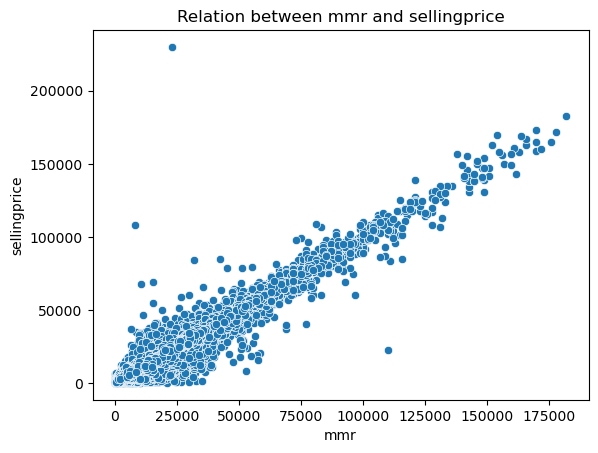

In [17]:
sns.scatterplot(x="mmr", y="sellingprice", data=df).set(title='Relation between mmr and sellingprice')

In [18]:
df['sellingcategory']=df['sellingrange'].astype('category').cat.codes
corr=df['mmr'].corr(df['sellingcategory'])
corr
#The correlation decreases significantly if we increase the maximum selling price window

0.8083288431582858

In [17]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingrange,sellingcategory
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,20000-30000,11
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00,20000-30000,11


[Text(0.5, 1.0, 'Relation between mmr and Selling Window')]

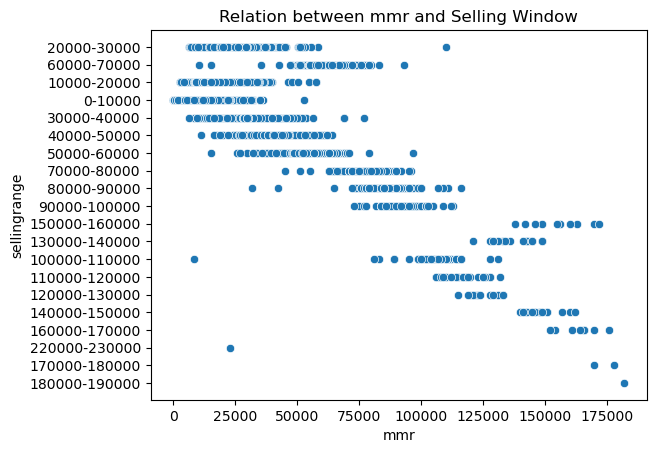

In [20]:
sns.scatterplot(x="mmr", y="sellingrange", data=df).set(title='Relation between mmr and Selling Window')
#We observed that as the selling range increases number of mmr decreases. Most of them falls under first half of range

Sample narrative description.

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [23]:
#Getting the data between 2010 and 2015
df=df[df['year']>=2010]

Sample narrative description.

In [24]:
#Getting only top 10 make data
top10make=df['make'].value_counts()[:10].index.tolist()
df2=df.query('make in @top10make')
df2=df2[['make','sellingprice']]

[Text(0.5, 1.0, 'Relation between Top 10 make and sellingprice between 2010-2015')]

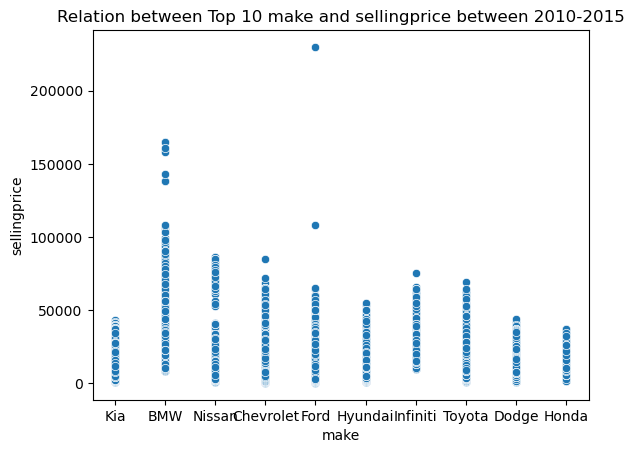

In [26]:
#We observed that sellingprice of all top 10 make falls under same range between 0-80000. Only BMW's selingprice is 
#at little higher end than others. There are few outliers in BMW and Ford.
sns.scatterplot(x="make", y="sellingprice", data=df2).set(title='Relation between Top 10 make and sellingprice between 2010-2015')